In [ ]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/data/diabetes classification.csv')

In [ ]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,2.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


In [ ]:
df.dtypes

Diabetes_012            float64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object

In [ ]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
correlation_matrix = df.corr()

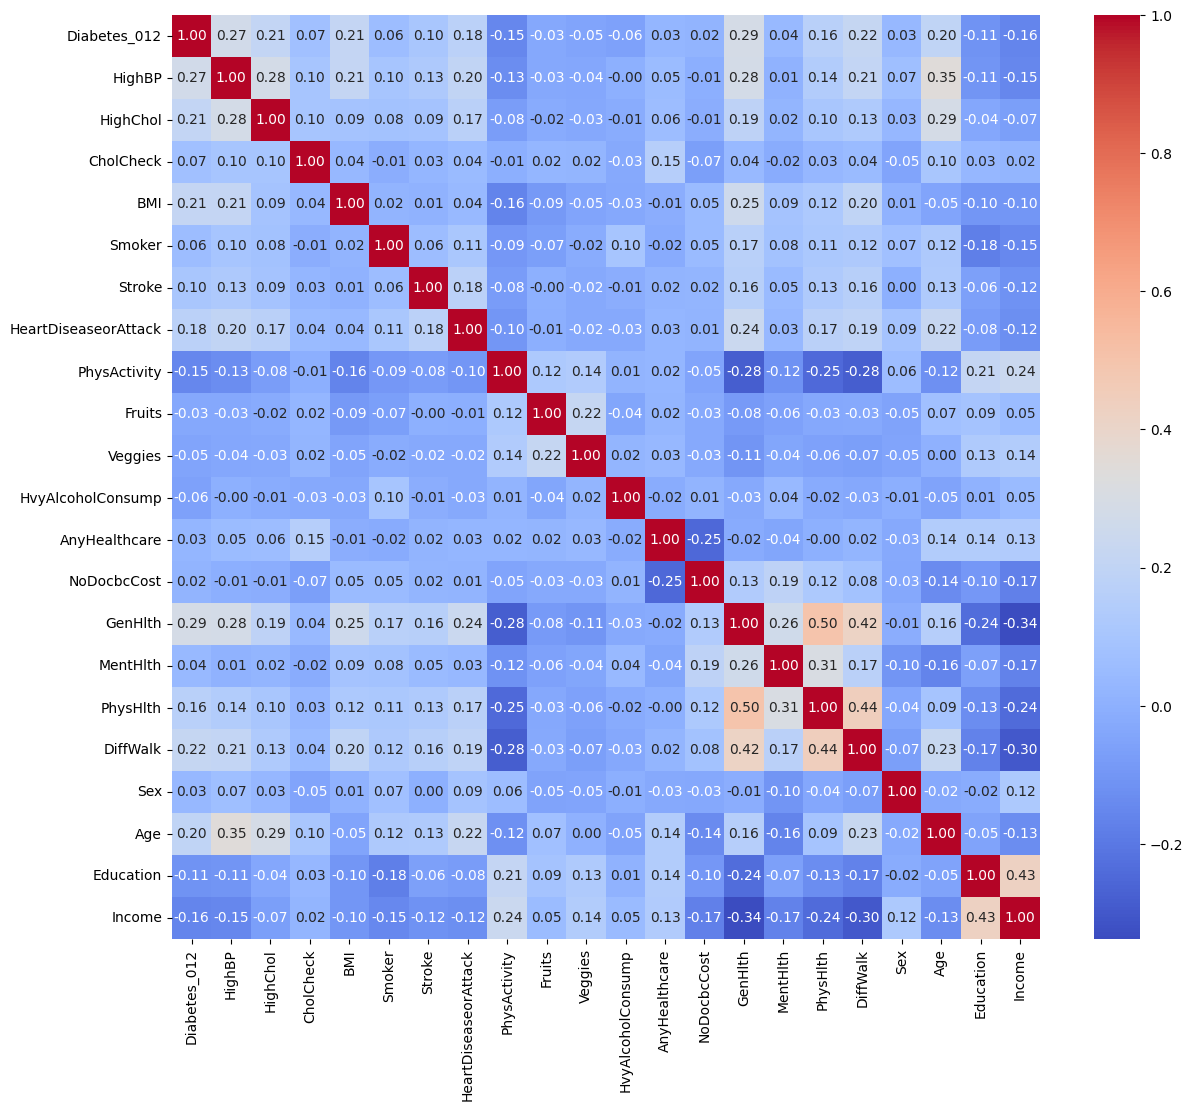

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
cols = [ 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']

In [ ]:
X = df[cols]

In [ ]:
y = df['Diabetes_012']

In [ ]:
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)

In [ ]:
sorted_features = sorted(zip(X.columns, fit.scores_), key=lambda x: x[1], reverse=True)
for feature, score in sorted_features:
    print(f"{feature}: {score}")


PhysHlth: 115126.28751734691
BMI: 15996.682773408611
Age: 12482.725084222837
HighBP: 9968.901510337637
DiffWalk: 9361.623202938265
GenHlth: 8408.813175407486
HeartDiseaseorAttack: 6817.723326007006
HighChol: 6173.995982354872
MentHlth: 6089.504430870478
Income: 5037.9025762602405
Stroke: 2404.611824115383
HvyAlcoholConsump: 769.8769224499075
Education: 497.1699534373262
Smoker: 483.2265672458286
Veggies: 93.63621357862586
Fruits: 85.45662114024603


In [ ]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [ ]:
importances = rf.feature_importances_

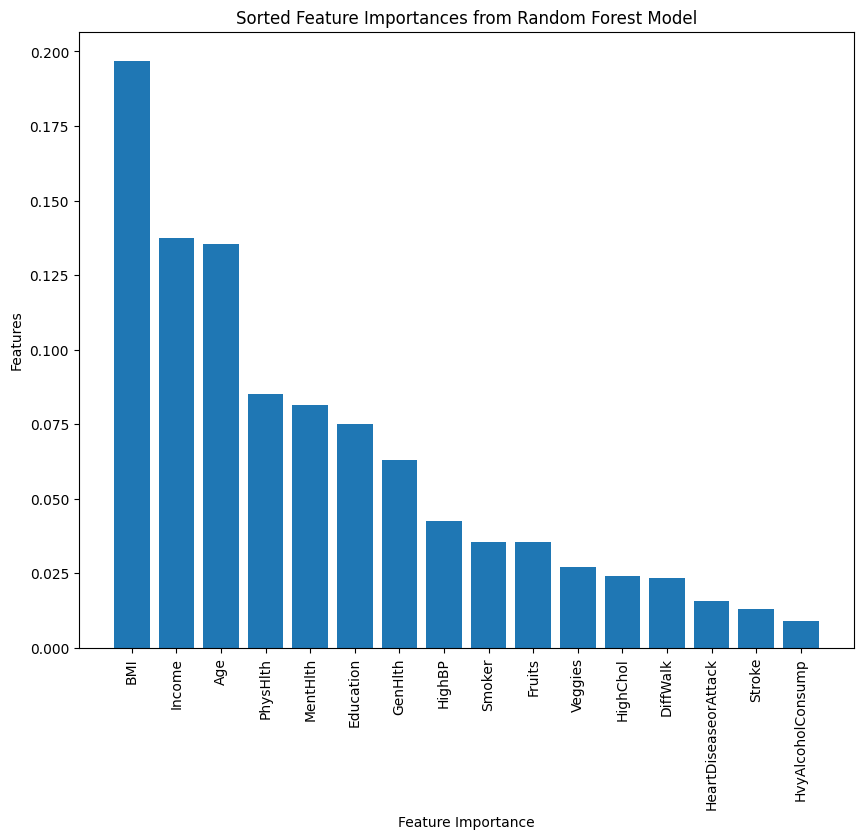

In [ ]:
feature_list = list(X.columns)
features = feature_list

# Combine, sort, and separate the feature names and their importances
sorted_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importances = zip(*sorted_features)

# Create the bar chart with sorted features
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Sorted Feature Importances from Random Forest Model')
plt.show()

In [ ]:
logreg = LogisticRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8381588966917675

In [ ]:
#logreg .83705

In [ ]:
#logreg .83800

In [ ]:
#logreg .83815

In [ ]:
scaler = StandardScaler()
X_trainSVC = scaler.fit_transform(X_train)
X_testSVC = scaler.transform(X_test)
#Wanted to use SVC but the dataset was too large and scaling the y_train did not work for some reason.

In [ ]:
#svc = SVC(kernel='linear')

In [ ]:
#svc.fit(X_trainSVC, y_trainSVC)

In [ ]:
#y_predSVC = svc.predict(X_testSVC)

In [ ]:
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predrf = rf.predict(X_test)

In [ ]:
df['Diabetes_012'].value_counts()

0.0    197191
2.0     33568
1.0      5619
Name: Diabetes_012, dtype: int64

In [ ]:
print(confusion_matrix(y_test, y_predrf))
print(classification_report(y_test, y_predrf))

[[47306    88  1961]
 [ 1207     1   157]
 [ 6751    17  1607]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90     49355
         1.0       0.01      0.00      0.00      1365
         2.0       0.43      0.19      0.27      8375

    accuracy                           0.83     59095
   macro avg       0.43      0.38      0.39     59095
weighted avg       0.78      0.83      0.79     59095



For class 0.0: Out of 49355 true instances, 47303 were correctly predicted as 0.0 (true positives), 94 were incorrectly predicted as 1.0, and 1958 as 2.0.
For class 1.0: Out of 1365 instances, only 3 were correctly predicted as 1.0, 1194 were incorrectly predicted as 0.0, and 168 as 2.0.
For class 2.0: Out of 8375 instances, 1629 were correctly predicted as 2.0, 6729 were incorrectly predicted as 0.0, and 17 as 1.0.


In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softprob', 'num_class': 3,
    'eval_metric': 'logloss'
}


In [ ]:
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

In [ ]:
y_predxgb = bst.predict(dtest)

In [ ]:
y_predxgb

array([[0.8679175 , 0.03768218, 0.09440032],
       [0.9847039 , 0.00716158, 0.00813449],
       [0.9153536 , 0.0163611 , 0.06828527],
       ...,
       [0.96323913, 0.00797837, 0.02878252],
       [0.97985935, 0.00646601, 0.01367464],
       [0.9550836 , 0.01447428, 0.03044215]], dtype=float32)

In [ ]:
y_predxgb = np.argmax(y_predxgb, axis=1)


In [ ]:
accuracy = accuracy_score(y_test, y_predxgb)
print("Accuracy:", accuracy)

Accuracy: 0.8410863863271004


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

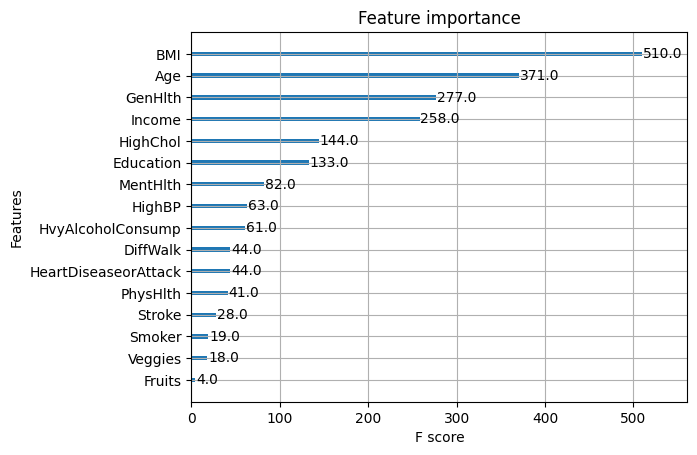

In [ ]:
xgb.plot_importance(bst)

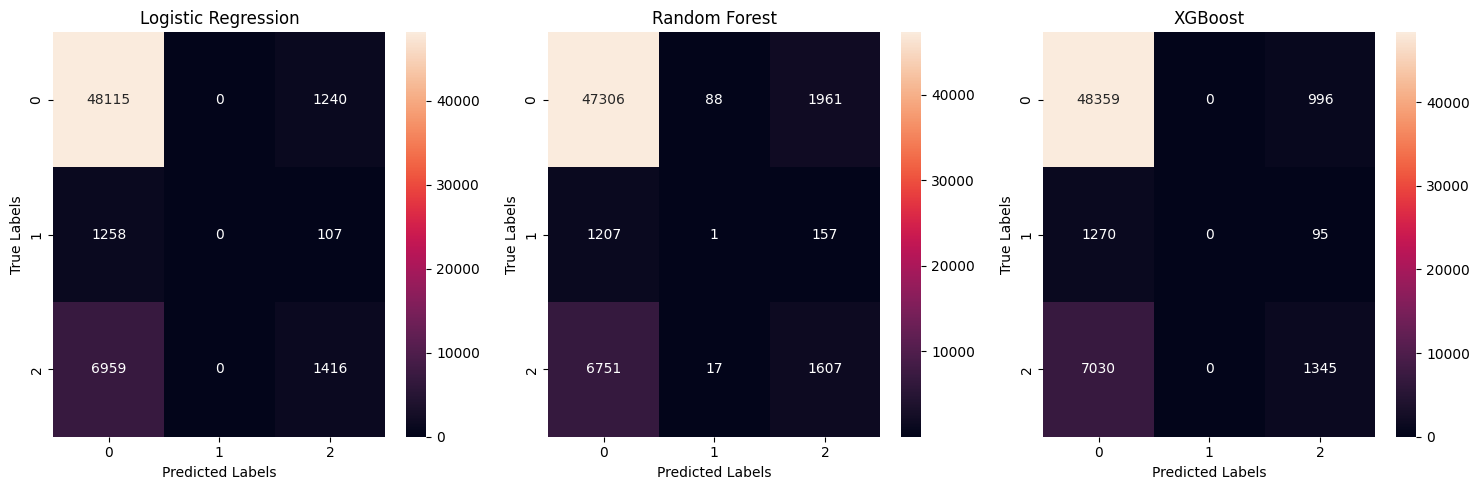

In [ ]:
matrices = {
    "Logistic Regression": confusion_matrix(y_test, y_pred),
    "Random Forest": confusion_matrix(y_test, y_predrf),
    "XGBoost": confusion_matrix(y_test, y_predxgb)
}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, (model, matrix) in enumerate(matrices.items()):
    sns.heatmap(matrix, annot=True, ax=axes[i], fmt='g')
    axes[i].set_title(model)
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.tight_layout()
plt.show()